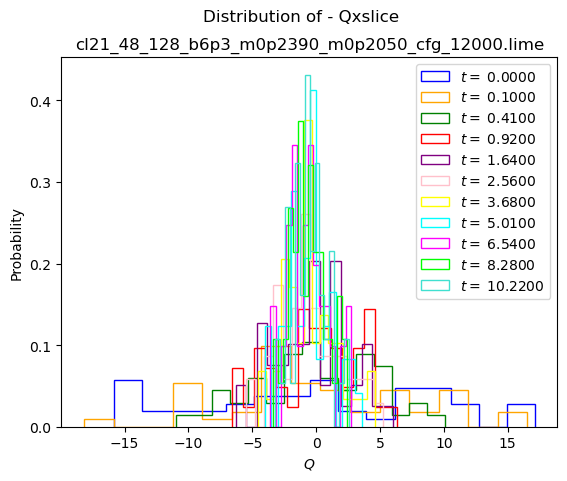

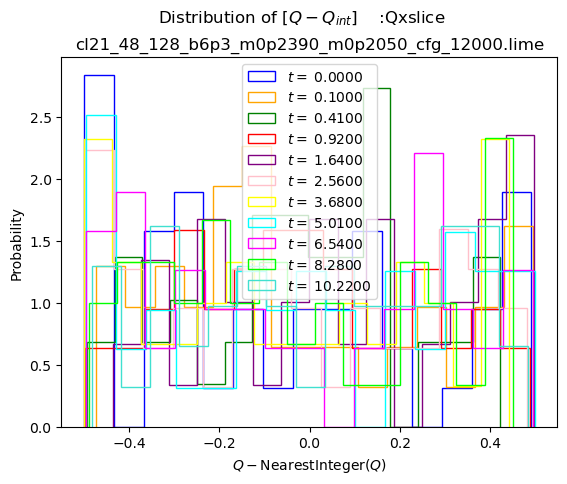

In [13]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

a = 0.114
colors = [
    'blue', 'orange', 'green', 'red', 'purple', 
    'pink', 'yellow', 'cyan', 'magenta', 'lime', 'turquoise'
]


flow_time = [0, 0.10, 0.41, 0.92, 1.64, 2.56, 3.68, 5.01, 6.54, 8.28, 10.22]


def list_observ(observable, ft):
    observable_cfg = []
    file_path = f"/pscratch/sd/h/hari_8/nEDM_project_LANL/save_GF_h5/save_Qx_ChiQQ0_WilsonFlow_lanl_cfg_12000_.h5"
    h5_file = h5py.File(file_path, "r")
    path_to_observable_cfgb = f"/lanl_cfg_12000/{observable}/flow_time_{ft}_fm"
    observable_cfgb = h5_file[path_to_observable_cfgb][()] 
    observable_cfg.append(observable_cfgb)
    #for cfga in range(1336, 1560+1, 4): #1612
    #    path_to_observable_cfga = f"/a_cfg_{cfga}/{observable}/flow_time_{ft}_fm" #_fm
    #    observable_cfga = h5_file[path_to_observable_cfga][()]
    #    observable_cfg.append(observable_cfga)
    return observable_cfg

def plt_histogramQ(observable, flow_time_list):
    for idx, f_t in enumerate(flow_time_list):
        observable_list = list_observ(observable, f_t)
        plt.hist(observable_list[0], histtype='step', bins=15, density=True, color=colors[idx], label="$t=$ %.4f" % (f_t))
    plt.legend()
    plt.ylabel("Probability")
    plt.xlabel("$Q$")
    plt.title("cl21_48_128_b6p3_m0p2390_m0p2050_cfg_12000.lime")
    plt.suptitle("Distribution of - %s"%(observable))
    plt.savefig("Distribution_of_%s.pdf"%(observable), dpi=50000)
    plt.show()
    return

def plt_histogram_minu_nearestintegerQ(observable, flow_time_list):
    for idx, f_t in enumerate(flow_time_list):
        observable_list = list_observ(observable, f_t)
        nearestinteger_diff_observable_list = [value-np.round(value) for value in observable_list[0]]  #[0] to extract the array
        plt.hist(nearestinteger_diff_observable_list, histtype='step', bins=15, density=True, color=colors[idx],  label="$t=$ %.4f" % (f_t))
    plt.legend()
    plt.ylabel("Probability")
    plt.xlabel("$Q-$NearestInteger$(Q)$")
    plt.title("cl21_48_128_b6p3_m0p2390_m0p2050_cfg_12000.lime")
    plt.suptitle("Distribution of $[Q-Q_{int}]$    :%s"%(observable))
    plt.savefig("Distribution_of_NearestInteger_int_%s.pdf"%(observable), dpi=50000)
    plt.show()
    return

plt_histogramQ("Qxslice", flow_time)
plt_histogram_minu_nearestintegerQ("Qxslice", flow_time)

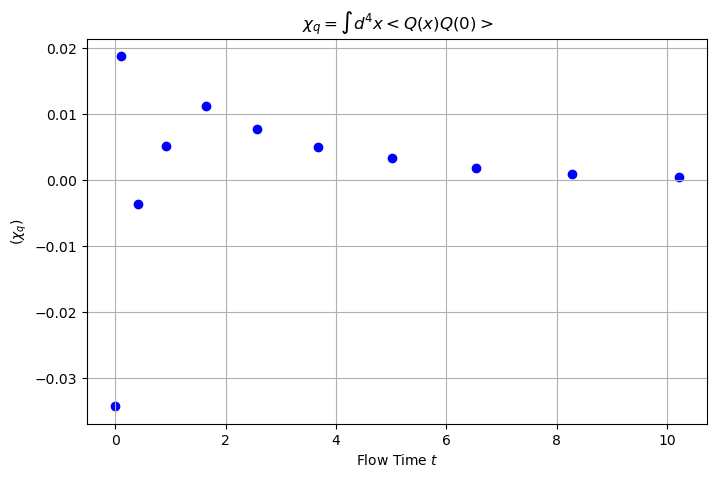

In [12]:
data_points = []

for idx, f_t in enumerate(flow_time):
    chiq = list_observ("ChiQQ0", f_t) 
    transformed_value = chiq[0] 
    data_points.append((f_t, transformed_value))  

# Convert to NumPy arrays for plotting
flow_time_vals, transformed_chiq_vals = zip(*data_points)

# Plot the results
plt.figure(figsize=(8, 5))
plt.scatter(flow_time_vals, transformed_chiq_vals, marker='o', linestyle='-', color='b')

plt.xlabel("Flow Time $t$")
plt.ylabel("$(\chi_q)$")
plt.title("$\chi_q = \int d^4x <Q(x)Q(0)>$")
plt.grid()
plt.savefig("QxQ0.pdf", dpi=50000)
plt.show()